In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#LOADING DATA SET
file_path = '/content/weatherHistory.csv'
df = pd.read_csv(file_path)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
#DATA PREPORCESSING

# Convert 'Formatted Date' to datetime
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])

# Check for missing values
df.isnull().sum()

<ipython-input-3-9ec02b08c555>:4: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])


,0
Formatted Date,0
Summary,0
Precip Type,517
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0


In [4]:
#EXPLORATORY DATA ANALYSIS

# Summary statistics
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


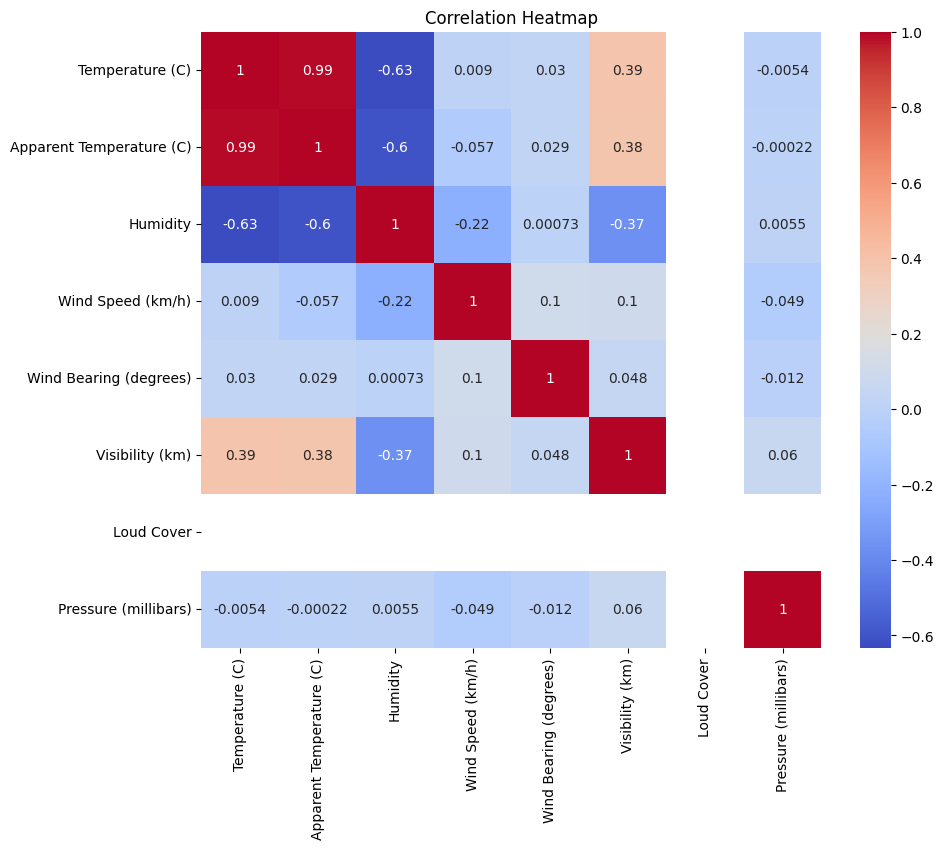

In [5]:
#CORELATION HEATMAP

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

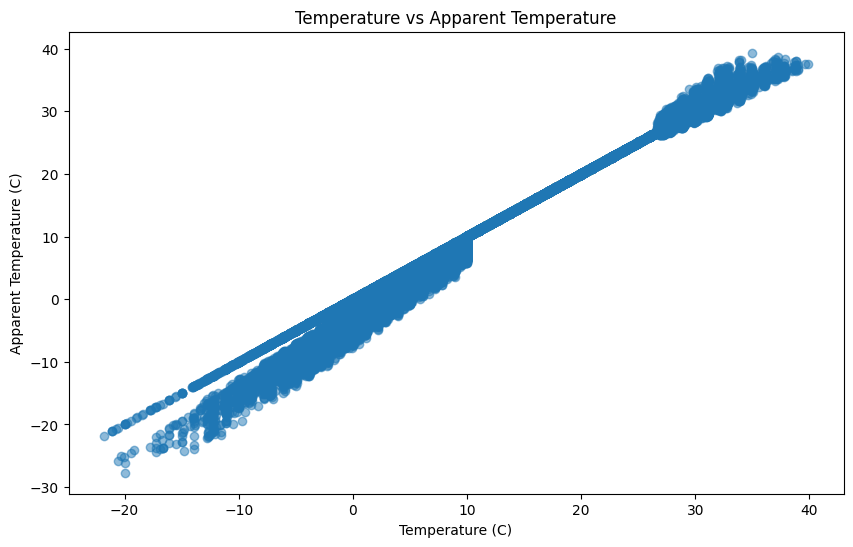

In [6]:
#TEMPERATURE ANALYSIS

# Plot Temperature vs Apparent Temperature
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature (C)'], df['Apparent Temperature (C)'], alpha=0.5)
plt.title('Temperature vs Apparent Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Apparent Temperature (C)')
plt.show()

In [9]:
#PRDECTIVE MODELLING

# Define features and target variable
X = numeric_df.drop(columns=['Apparent Temperature (C)'])
y = numeric_df['Apparent Temperature (C)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression model
model = LinearRegression() # This line is added to create the model object

# Fit the Linear Regression model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model (e.g., using R-squared, Mean Squared Error)
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")





R-squared: 0.989960368221567
Mean Squared Error: 1.161573181671324


In [10]:
predictions = model.predict(X_test)

In [11]:
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [14]:
accuracy=LR.score(X_test,y_test)
accuracy

0.989960368221567

In [15]:
cmodel=LinearRegression()
cmodel.fit(X_train,y_train)

LinearRegression()

In [17]:
from sklearn.metrics import confusion_matrix

In [19]:
confusion_matrix=(y_test,y_pred)

In [20]:
confusion_matrix

(87206    28.827778
 33421     7.988889
 6807     14.400000
 37340    -2.722222
 3016     -2.672222
            ...    
 94353     7.077778
 56859    17.894444
 9080     10.716667
 47825    24.888889
 43409    18.861111
 Name: Apparent Temperature (C), Length: 19291, dtype: float64,
 array([28.68237401,  8.4116828 , 13.50671119, ...,  9.39414641,
        24.81111547, 18.03427106]))

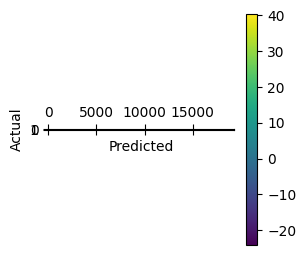

In [28]:
fig,ax=plt.subplots(figsize=(3,3))
cmax=ax.matshow(confusion_matrix)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.colorbar(cmax)
plt.show()

In [29]:
from sklearn.metrics import classification_report

In [31]:
classification_report=(y_test,y_pred)
classification_report

(87206    28.827778
 33421     7.988889
 6807     14.400000
 37340    -2.722222
 3016     -2.672222
            ...    
 94353     7.077778
 56859    17.894444
 9080     10.716667
 47825    24.888889
 43409    18.861111
 Name: Apparent Temperature (C), Length: 19291, dtype: float64,
 array([28.68237401,  8.4116828 , 13.50671119, ...,  9.39414641,
        24.81111547, 18.03427106]))